# Assignment 2
## Programming for Data Science (BUAN 6340)


Deliverables:

- Write down your codes in the given cells described in this file, denoted as "YOUR CODES"
- Use "download as" in the "file" menu to convert your ipython file to a .html file
- Submit both .ipynb and .html files to the eLearning (you might need to compress them into one single file)


This assignment covers data manipulation and visualization


The total score: 100

In [1]:
NAME = "Aneesa Noorani"
Session = "003"

In this assignment, we will explore an economic indicator [dataset](https://www.kaggle.com/worldbank/world-development-indicators). 

Please downloand **indicator.csv** from eLearning.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#Import data
world = pd.read_csv('Indicators.csv')
world.shape

(5656458, 6)

In [4]:
world.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


## Part I: Initial Exploration (18 points)

**Use <font color='red'>one or two</font> lines to answer each of the following <font color='red'>FIVE</font> questions**

Hint: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html

**Q1.1** How many UNIQUE country names are there? (3 points)

In [5]:
# YOUR CODES
world['CountryName'].nunique()

247

**Q1.2** How many years of data do we have? (3 points)

In [6]:
# YOUR CODES
world['Year'].nunique()

56

**Q1.3** What's the range of years? (3 points)

In [7]:
# YOUR CODES
yr_range = world['Year'].max() - world['Year'].min()
    #max: 2015, min: 1960
print(yr_range)

55


**Q1.4** How many unique indicators? (3 points)

In [8]:
# YOUR CODES
world['IndicatorCode'].nunique()

1344

**Q1.5** How many unique indiactors does United States have in 2000? (6 points)

In [9]:
# YOUR CODES
USA_2000 = world[(world.CountryCode == 'USA') & (world.Year == 2000)]
USA_2000['IndicatorCode'].nunique()

646

## Part II: Visualizaion (60 points)

### Let's pick a country and an indicator to explore: CO2 Emissions per capita and the USA

**Q2.1** Create a new dataframe where country = United State & Indicator =  'CO2 emissions (metric tons per capita)' (10 points)

Expected output: size of the dataframe and the first 5 lines of the dataframe

In [10]:
# YOUR CODES
df = world[(world.CountryCode == 'USA') & (world.IndicatorCode == 'EN.ATM.CO2E.PC')]
df.shape
df.head()

(52, 6)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


**Q2.2** Plot the trend of CO2 emissions over time in USA (10 points)

Text(0.5, 1.0, 'Co2 emissions over time in USA')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'CO2 Emissions (metric tons per capita)')

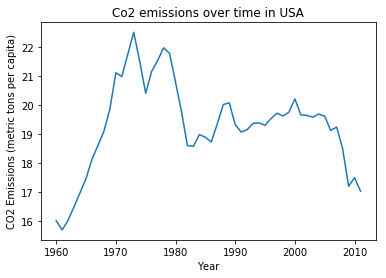

In [11]:
%matplotlib inline

# YOUR CODES
plt.plot(df.Year, df.Value)
plt.title("Co2 emissions over time in USA")
plt.xlabel("Year")
plt.ylabel("CO2 Emissions (metric tons per capita)")

### But how do the USA's numbers relate to those of other countries?

**Q2.3** (20 points)

- select CO2 emissions per capital for all countries in 2011
- plot a histogram of the emmissions per capita by country
- indicate the position of USA in the plot


(array([101.,  35.,  35.,  22.,  15.,   7.,   3.,   4.,   2.,   3.,   1.,
          1.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([2.13499261e-02, 2.22122875e+00, 4.42110757e+00, 6.62098639e+00,
        8.82086521e+00, 1.10207440e+01, 1.32206229e+01, 1.54205017e+01,
        1.76203805e+01, 1.98202593e+01, 2.20201381e+01, 2.42200170e+01,
        2.64198958e+01, 2.86197746e+01, 3.08196534e+01, 3.30195323e+01,
        3.52194111e+01, 3.74192899e+01, 3.96191687e+01, 4.18190475e+01,
        4.40189264e+01]),
 <a list of 20 Patch objects>)

Text(0.5, 0, 'CO2 Emissions')

Text(0, 0.5, '# of Countries')

Text(0.5, 1.0, 'Histogram-CO2 Emissions per Capita')

Text(17.02, 24, 'USA: 17.02')

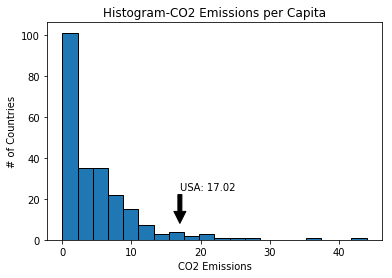

In [12]:
# YOUR CODES

data = world[(world.Year == 2011) & (world.IndicatorCode == 'EN.ATM.CO2E.PC')]
plt.hist(data['Value'], bins=20, edgecolor='black')
plt.xlabel('CO2 Emissions')
plt.ylabel('# of Countries')
plt.title('Histogram-CO2 Emissions per Capita')
plt.annotate('USA: 17.02', xy=(17.02,8), xytext=(17.02, 24),
             arrowprops=dict(facecolor='black'))
plt.show()


### ScatterPlot for comparing GDP against CO2 emissions (per capita) in USA

**Q2.4** (20 points)

- Select GDP Per capital for USA (Indicator = 'GDP per capita (constant 2005 US$)')
- Use a scattor plot to explore the relationship between GDP and CO2 emissions

Hint: before plotting, you have to make sure that the two measures cover the same period of time

<bound method Series.min of 22282      1960
48759      1961
77142      1962
105760     1963
134798     1964
166730     1965
198096     1966
230814     1967
263369     1968
296354     1969
358010     1970
425989     1971
495783     1972
565205     1973
635285     1974
707764     1975
781179     1976
856837     1977
932497     1978
1008328    1979
1089607    1980
1173536    1981
1258738    1982
1343992    1983
1429895    1984
1517335    1985
1605202    1986
1694598    1987
1784067    1988
1876583    1989
1992875    1990
2108826    1991
2230117    1992
2353864    1993
2479530    1994
2613859    1995
2748826    1996
2885119    1997
3022452    1998
3164380    1999
3319022    2000
3469669    2001
3624311    2002
3778080    2003
3935823    2004
4115443    2005
4292637    2006
4472959    2007
4652803    2008
4831465    2009
5018182    2010
5194861    2011
5370008    2012
5527438    2013
5637323    2014
Name: Year, dtype: int64>

<bound method Series.min of 22232      1960
48708      1961
77087      1962
105704     1963
134742     1964
166672     1965
198040     1966
230758     1967
263313     1968
296298     1969
357938     1970
425914     1971
495708     1972
565132     1973
635210     1974
707686     1975
781101     1976
856760     1977
932420     1978
1008251    1979
1089510    1980
1173439    1981
1258640    1982
1343895    1983
1429798    1984
1517238    1985
1605105    1986
1694501    1987
1783972    1988
1876489    1989
1992771    1990
2108719    1991
2230012    1992
2353757    1993
2479423    1994
2613751    1995
2748720    1996
2885015    1997
3022340    1998
3164265    1999
3318907    2000
3469547    2001
3624184    2002
3777954    2003
3935696    2004
4115299    2005
4292492    2006
4472814    2007
4652656    2008
4831320    2009
5018038    2010
5194727    2011
Name: Year, dtype: int64>

<bound method Series.min of 22282      1960
48759      1961
77142      1962
105760     1963
134798     1964
166730     1965
198096     1966
230814     1967
263369     1968
296354     1969
358010     1970
425989     1971
495783     1972
565205     1973
635285     1974
707764     1975
781179     1976
856837     1977
932497     1978
1008328    1979
1089607    1980
1173536    1981
1258738    1982
1343992    1983
1429895    1984
1517335    1985
1605202    1986
1694598    1987
1784067    1988
1876583    1989
1992875    1990
2108826    1991
2230117    1992
2353864    1993
2479530    1994
2613859    1995
2748826    1996
2885119    1997
3022452    1998
3164380    1999
3319022    2000
3469669    2001
3624311    2002
3778080    2003
3935823    2004
4115443    2005
4292637    2006
4472959    2007
4652803    2008
4831465    2009
5018182    2010
5194861    2011
Name: Year, dtype: int64>

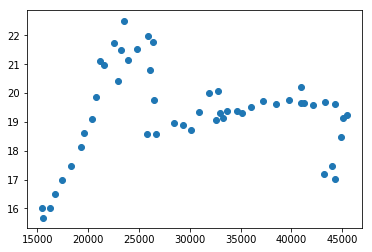

In [13]:
# YOUR CODES
#creating new data frames
data2 = world[(world.CountryCode=='USA') & 
              (world.IndicatorName == 'GDP per capita (constant 2005 US$)')]
data3 = world[(world.CountryCode=='USA') & 
              (world.IndicatorCode == 'EN.ATM.CO2E.PC')]

#printing out the year columns to see the min, max
data2['Year'].min
data3['Year'].min

#splice data2 to only include up to 2011
data2 = data2[0:52]

#printing data2 again to confirm it only goes up to year 2011
data2['Year'].min

plt.scatter(data2['Value'],data3['Value'])


## Part III: We are missing data (22 points)

The above analyses have suggested that not all countries have all indicators for all years. Thus, let's pick indicators and countries which have data over the same time range

In [14]:
# range of the three variables

countries_list = world['CountryName'].unique().tolist()
indicators_list = world['IndicatorName'].unique().tolist()

yearfilter = range(2000,2012)

**Q3.1** write a program to find **TWO** countries from **countries_list** and **ONE** indicator from **indicators_list** so that the selected two countries have records of the indicator from 2000 to 2011 (the time range is defined in **yearfilter**). (16 points)

For example, both Bermuda and Costa Rica have records of the indicator "Merchandise exports to developing economies outside region (% of total merchandise exports)" from 2000 to 2011.

Hint: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html

Expected output:
- Two dataframe, indicating the two countries separately
- The two dataframe only include data with the specific indicator
- Both dataframe cover the same period of time from 2000 to 2011

In [15]:
import random
random.seed(25) # generate the same random number every time

# YOUR CODES

    #picking random indicator from indicators_list
random_indic = random.choice(indicators_list)

#new data frame that only includes years in the specified range
data4 = world[(world["Year"].isin(yearfilter))]

#another new dataframe that only includes specified indicator
data5 = data4[(data4["IndicatorName"] == random_indic)]
    #data5 - has info for specified indicator, all countries, & only yrs 2000-2011

#grouping by country. only returns countries that have values present for each yr bc of the query part.
    #we only want countries that have a value of 12
complete = data5.groupby("CountryName").count().query("Value == {}".format(len(yearfilter)))
    #len(complete)
    #final list of countries has length of 18 (at least for this random seed)

    #indexing, then turning into list
complete2 = complete.index[:].tolist()

    #randomly picking 2 countries from complete2
country_a = random.choice(complete2)
country_b = random.choice(complete2)

    #creating dataframe of just those 2 countries
country_a_df = data5[data5.CountryName == country_a]
country_b_df = data5[data5.CountryName == country_b]

country_a_df
country_b_df

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
3194185,Argentina,ARG,Poverty gap at $1.90 a day (2011 PPP) (%),SI.POV.GAPS,2000,2.93
3347673,Argentina,ARG,Poverty gap at $1.90 a day (2011 PPP) (%),SI.POV.GAPS,2001,4.90
3498691,Argentina,ARG,Poverty gap at $1.90 a day (2011 PPP) (%),SI.POV.GAPS,2002,5.59
3653645,Argentina,ARG,Poverty gap at $1.90 a day (2011 PPP) (%),SI.POV.GAPS,2003,4.85
3807546,Argentina,ARG,Poverty gap at $1.90 a day (2011 PPP) (%),SI.POV.GAPS,2004,3.16
3969354,Argentina,ARG,Poverty gap at $1.90 a day (2011 PPP) (%),SI.POV.GAPS,2005,2.27
4149265,Argentina,ARG,Poverty gap at $1.90 a day (2011 PPP) (%),SI.POV.GAPS,2006,1.91
4327040,Argentina,ARG,Poverty gap at $1.90 a day (2011 PPP) (%),SI.POV.GAPS,2007,1.77
4507470,Argentina,ARG,Poverty gap at $1.90 a day (2011 PPP) (%),SI.POV.GAPS,2008,1.43
4687003,Argentina,ARG,Poverty gap at $1.90 a day (2011 PPP) (%),SI.POV.GAPS,2009,1.49


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
3230549,Estonia,EST,Poverty gap at $1.90 a day (2011 PPP) (%),SI.POV.GAPS,2000,0.28
3383325,Estonia,EST,Poverty gap at $1.90 a day (2011 PPP) (%),SI.POV.GAPS,2001,0.29
3535482,Estonia,EST,Poverty gap at $1.90 a day (2011 PPP) (%),SI.POV.GAPS,2002,0.30
3689831,Estonia,EST,Poverty gap at $1.90 a day (2011 PPP) (%),SI.POV.GAPS,2003,0.21
3844684,Estonia,EST,Poverty gap at $1.90 a day (2011 PPP) (%),SI.POV.GAPS,2004,0.13
4011780,Estonia,EST,Poverty gap at $1.90 a day (2011 PPP) (%),SI.POV.GAPS,2005,0.92
4190894,Estonia,EST,Poverty gap at $1.90 a day (2011 PPP) (%),SI.POV.GAPS,2006,0.62
4369621,Estonia,EST,Poverty gap at $1.90 a day (2011 PPP) (%),SI.POV.GAPS,2007,0.38
4549897,Estonia,EST,Poverty gap at $1.90 a day (2011 PPP) (%),SI.POV.GAPS,2008,0.42
4729302,Estonia,EST,Poverty gap at $1.90 a day (2011 PPP) (%),SI.POV.GAPS,2009,0.66


**Q3.2** Plot the correlation of the two countries with the selected indicator (scatter plots) (6 points)

Text(0.5, 0, 'Country A Value')

Text(0, 0.5, 'Country B Value')

Text(0.5, 1.0, 'Correlation between Country A and Country B Values')

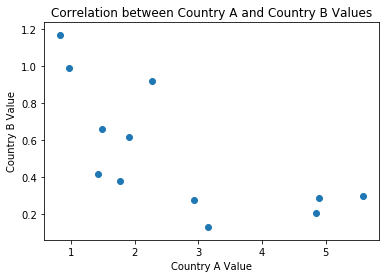

In [16]:
# YOUR CODES

#merging data sets first
final = country_a_df.merge(country_b_df, on = ["Year"])

plt.scatter(final["Value_x"], final["Value_y"])
plt.xlabel("Country A Value")
plt.ylabel("Country B Value")
plt.title("Correlation between Country A and Country B Values")
